<a href="https://colab.research.google.com/github/js0807/ai_study/blob/main/ocr_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio

     |████████████████████████████████| 1.9 MB 4.3 MB/s 


In [2]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 21 kB/s 
     |████████████████████████████████| 37.1 MB 53 kB/s 


In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
!ls

sample_data  sign.png  surf.jpeg


## OCR

In [5]:
IMAGE_PATH = 'surf.jpeg'

In [9]:
IMAGE_PATH1='sign.png'

In [10]:
reader=easyocr.Reader(['en'],gpu=False)
result=reader.readtext(IMAGE_PATH1)
result

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256296390029),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683687979328574),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973478739152)]

## DRAW IMAGE - single

In [7]:
top_left=tuple(result[0][0][0])
bottom_right=tuple(result[0][0][2])
text=result[0][1]
font=cv2.FONT_HERSHEY_SIMPLEX

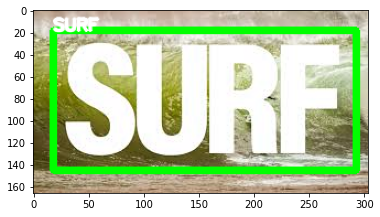

In [8]:
img=cv2.imread(IMAGE_PATH)
img=cv2.rectangle(img,top_left,bottom_right,(0,255,0), 5)
img=cv2.putText(img,text,top_left,font,.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

## DRAW RESULT - multiple

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

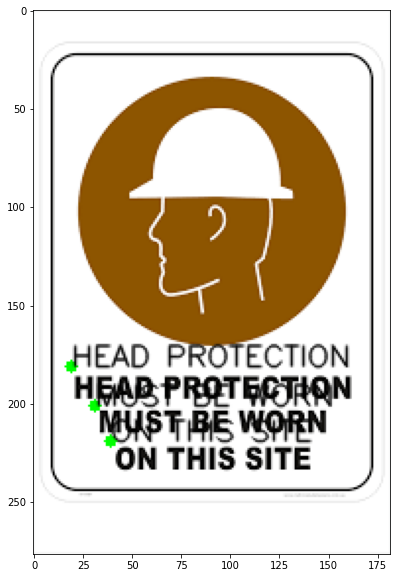

In [16]:
img = cv2.imread(IMAGE_PATH1)
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][0]])
  text=detection[1]
  font=cv2.FONT_HERSHEY_SIMPLEX
  img=cv2.rectangle(img,top_left,bottom_right,(0,255,0), 5)
  img=cv2.putText(img,text,top_left,font,0.5,(0,0,0),1,cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt